In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split 

boston=load_boston()
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

### Пример 1. LinearRegression

In [2]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0) 

boston_st_non = LinearRegression()
boston_st_non.fit(X_train, y_train)
print("R-квадрат обучение: {:.2f}".format(boston_st_non.score(X_train, y_train))) 
print("R-квадрат тест: {:.2f}".format(boston_st_non.score(X_test, y_test)))
print("-------------------------------")
print("boston_st.coef_: {}".format( boston_st_non.coef_ )) 
print("boston_st.intercept_: {}".format( boston_st_non.intercept_  ))

R-квадрат обучение: 0.77
R-квадрат тест: 0.64
-------------------------------
boston_st.coef_: [-1.17735289e-01  4.40174969e-02 -5.76814314e-03  2.39341594e+00
 -1.55894211e+01  3.76896770e+00 -7.03517828e-03 -1.43495641e+00
  2.40081086e-01 -1.12972810e-02 -9.85546732e-01  8.44443453e-03
 -4.99116797e-01]
boston_st.intercept_: 36.933255457118975


In [3]:
# А нужно ли перемасштабирование Scaler? Проверим!

from sklearn.pipeline import make_pipeline


boston_st = make_pipeline( MinMaxScaler(), LinearRegression() )
boston_st.fit(X_train, y_train)

print("R-квадрат обучение: {:.2f}".format(boston_st.score(X_train, y_train))) 
print("R-квадрат тест: {:.2f}".format(boston_st.score(X_test, y_test)))
print("-------------------------------")
# ВНИМАНИЕ! СИЛЬНОЕ ОТЛИЧИЕ из-за Pipline
print("boston_st.coef_: {}".format( boston_st.named_steps['linearregression'].coef_ )) 
print("boston_st.intercept_: {}".format( boston_st.named_steps['linearregression'].intercept_  ))

R-квадрат обучение: 0.77
R-квадрат тест: 0.64
-------------------------------
boston_st.coef_: [-10.47489456   4.40174969  -0.15735494   2.39341594  -7.57645867
  19.67024242  -0.68311581 -15.71607313   5.52186497  -5.91977522
  -9.26413928   3.34889385 -17.59386711]
boston_st.intercept_: 27.49272790795228


### О наборе расширенный Бостон

In [4]:
def load_extended_boston():
    boston = load_boston()
    X = boston.data
    X = MinMaxScaler().fit_transform(boston.data)
    X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
    return X, boston.target

In [5]:
boston.data.shape

(506, 13)

In [6]:
X,y = load_extended_boston()
X.shape

(506, 104)

In [7]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

### Пример 2. Ridge

In [8]:
boston_ex = make_pipeline(MinMaxScaler(),
                          PolynomialFeatures(degree=2, include_bias=False), 
                          LinearRegression() 
                         )
boston_ex.fit(X_train, y_train)
print("R-квадрат обучение: {:.2f}".format(boston_ex.score(X_train, y_train))) 
print("R-квадрат тест: {:.2f}".format(boston_ex.score(X_test, y_test)))

R-квадрат обучение: 0.95
R-квадрат тест: 0.61


In [9]:
from sklearn.linear_model import Ridge
boston_ridge = make_pipeline(MinMaxScaler(),
                          PolynomialFeatures(degree=2, include_bias=False), 
                          Ridge() 
                         )
boston_ridge.fit(X_train, y_train)
print("R-квадрат обучение: {:.2f}".format(boston_ridge.score(X_train, y_train))) 
print("R-квадрат тест: {:.2f}".format(boston_ridge.score(X_test, y_test)))

R-квадрат обучение: 0.89
R-квадрат тест: 0.75


In [10]:
# уберите Scaler, что получится?
# причина штафы за евклидово расстояние
# совпадение случайно с LR
boston_ridge_non = make_pipeline(
                             PolynomialFeatures(degree=2, include_bias=False), 
                             Ridge() 
                            )
boston_ridge_non.fit(X_train, y_train)
print("R-квадрат обучение: {:.2f}".format(boston_ridge_non.score(X_train, y_train))) 
print("R-квадрат тест: {:.2f}".format(boston_ridge_non.score(X_test, y_test)))

R-квадрат обучение: 0.95
R-квадрат тест: 0.61


In [11]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold 

kfold = KFold(n_splits=10, shuffle=True, random_state=0)
param_grid =[
    {'ridge__alpha':[0.04,0.05,0.06,0.07,0.08,0.09]}
     ]
grid = GridSearchCV(boston_ridge, param_grid, cv=kfold, return_train_score=True, iid=True)
grid.fit(X_train,y_train)
print("R^2 наилучшей модели кроссвалидации на валидационных тестовых наборах: {:.6f}\n".format(grid.best_score_)) 
print("R^2 для наилучшей модели на тестовом наборе: {:.6f}\n".format(grid.score(X_test, y_test)))
print("Наилучшие параметры:\n{}\n".format(grid.best_params_))


R^2 наилучшей модели кроссвалидации на валидационных тестовых наборах: 0.870852

R^2 для наилучшей модели на тестовом наборе: 0.767736

Наилучшие параметры:
{'ridge__alpha': 0.07}



In [12]:
grid.best_estimator_

Pipeline(memory=None,
         steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=0.07, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

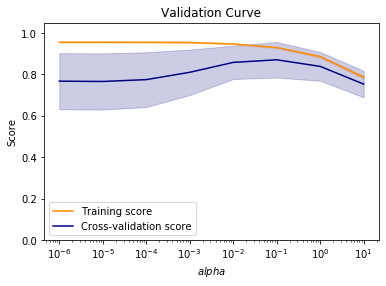

In [13]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import validation_curve

pipe = grid.best_estimator_

n_range = np.logspace(-6, 1, num=8, endpoint=True, base=10.0)
train_scores, test_scores = validation_curve(
    pipe, X_train, y_train,
    param_name ="ridge__alpha", 
    param_range = n_range,
    cv=KFold(n_splits=10, shuffle=True, random_state=0), 
    n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


plt.title("Validation Curve")
plt.xlabel("$alpha$")
plt.ylabel("Score")
plt.ylim(0, 1.05)

plt.semilogx(n_range, train_scores_mean, label="Training score", color="darkorange")
plt.fill_between(n_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange")
plt.semilogx(n_range, test_scores_mean, label="Cross-validation score",
             color="navy")
plt.fill_between(n_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy")
plt.legend(loc="best")
plt.show()

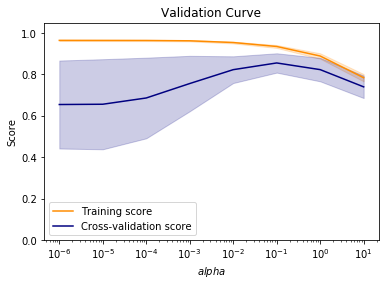

In [14]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import ShuffleSplit

pipe = grid.best_estimator_

n_range = np.logspace(-6, 1, num=8, endpoint=True, base=10.0)
train_scores, test_scores = validation_curve(
    pipe, X_train, y_train,
    param_name ="ridge__alpha", 
    param_range = n_range,
    cv=ShuffleSplit(n_splits=10,  test_size=0.3, train_size=0.7, random_state=0), 
    n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


plt.title("Validation Curve")
plt.xlabel("$alpha$")
plt.ylabel("Score")
plt.ylim(0, 1.05)

plt.semilogx(n_range, train_scores_mean, label="Training score", color="darkorange")
plt.fill_between(n_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange")
plt.semilogx(n_range, test_scores_mean, label="Cross-validation score",
             color="navy")
plt.fill_between(n_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy")
plt.legend(loc="best")
plt.show()

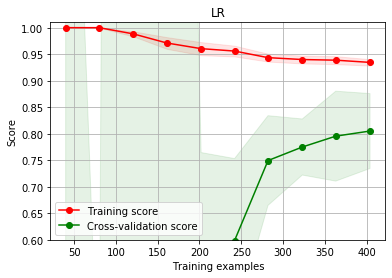

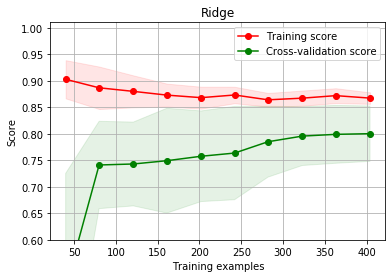

In [15]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

# код исходный тут https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

X, y = boston.data, boston.target


cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

title = "LR"
boston_ex = make_pipeline(MinMaxScaler(),
                          PolynomialFeatures(degree=2, include_bias=False), 
                          LinearRegression() 
                         )
boston_ex.fit(X, y)
estimator = boston_ex
plot_learning_curve(estimator, title, X, y, ylim=(0.6, 1.01), cv=cv, n_jobs=-1)


title = "Ridge"
boston_ridge = make_pipeline(MinMaxScaler(),
                          PolynomialFeatures(degree=2, include_bias=False), 
                          Ridge() 
                         )
boston_ridge.fit(X, y)

estimator = boston_ridge
plot_learning_curve(estimator, title, X, y, ylim=(0.6, 1.01), cv=cv, n_jobs=-1)

plt.show()

### Пример 3. Lasso

In [16]:
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=42) 
boston_lasso=make_pipeline(MinMaxScaler(),
                          PolynomialFeatures(degree=2, include_bias=False), 
                          Lasso() 
                         )
boston_lasso = boston_lasso.fit(X_train, y_train)

print("R-квадрат на обучающем наборе: {:.2f}".format(boston_lasso.score(X_train, y_train))) 
print("R-квадрат на контрольном наборе: {:.2f}".format(boston_lasso.score(X_test, y_test))) 
print("Количество использованных признаков: {}".format(np.sum(boston_lasso.named_steps['lasso'].coef_ != 0)))

R-квадрат на обучающем наборе: 0.28
R-квадрат на контрольном наборе: 0.27
Количество использованных признаков: 4


In [42]:
boston_lasso=make_pipeline(MinMaxScaler(),
                          PolynomialFeatures(degree=2, include_bias=False), 
                          Lasso(alpha=0.0001, tol = 0.1, max_iter=100000) 
                         )
boston_lasso = boston_lasso.fit(X_train, y_train)

print("R-квадрат на обучающем наборе: {:.2f}".format(boston_lasso.score(X_train, y_train))) 
print("R-квадрат на тестовом наборе: {:.2f}".format(boston_lasso.score(X_test, y_test))) 
print("Количество использованных признаков: {}".format(np.sum(boston_lasso.named_steps['lasso'].coef_ != 0)))

R-квадрат на обучающем наборе: 0.87
R-квадрат на тестовом наборе: 0.81
Количество использованных признаков: 102


In [18]:
boston_lasso=make_pipeline(MinMaxScaler(),
                          PolynomialFeatures(degree=2, include_bias=False), 
                          Lasso(alpha=0.001, max_iter=100000) 
                         )
boston_lasso = boston_lasso.fit(X_train, y_train)

print("R-квадрат на обучающем наборе: {:.2f}".format(boston_lasso.score(X_train, y_train))) 
print("R-квадрат на тестовом наборе: {:.2f}".format(boston_lasso.score(X_test, y_test))) 
print("Количество использованных признаков: {}".format(np.sum(boston_lasso.named_steps['lasso'].coef_ != 0)))

R-квадрат на обучающем наборе: 0.93
R-квадрат на тестовом наборе: 0.82
Количество использованных признаков: 71


In [19]:
boston_lasso=make_pipeline(MinMaxScaler(),
                          PolynomialFeatures(degree=2, include_bias=False), 
                          Lasso(alpha=0.01) 
                         )
boston_lasso = boston_lasso.fit(X_train, y_train)

print("R-квадрат на обучающем наборе: {:.2f}".format(boston_lasso.score(X_train, y_train))) 
print("R-квадрат на тестовом наборе: {:.2f}".format(boston_lasso.score(X_test, y_test))) 
print("Количество использованных признаков: {}".format(np.sum(boston_lasso.named_steps['lasso'].coef_ != 0)))

R-квадрат на обучающем наборе: 0.89
R-квадрат на тестовом наборе: 0.80
Количество использованных признаков: 36


/Users/macbook2019/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.97446610983161, tolerance: 3.361037625329815
  positive)


In [20]:
boston_lasso

Pipeline(memory=None,
         steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('lasso',
                 Lasso(alpha=0.01, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

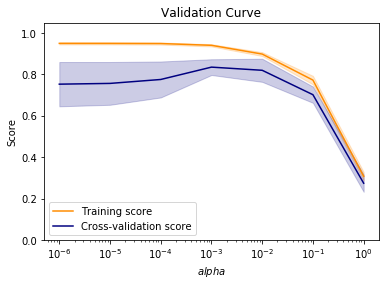

In [21]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import ShuffleSplit

pipe = boston_lasso

n_range = np.logspace(-6, 0, num=7, endpoint=True, base=10.0)
train_scores, test_scores = validation_curve(
    pipe, X_train, y_train,
    param_name ="lasso__alpha", 
    param_range = n_range,
    cv=ShuffleSplit(n_splits=10,  test_size=0.3, train_size=0.7, random_state=42), 
    n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


plt.title("Validation Curve")
plt.xlabel("$alpha$")
plt.ylabel("Score")
plt.ylim(0, 1.05)

plt.semilogx(n_range, train_scores_mean, label="Training score", color="darkorange")
plt.fill_between(n_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange")
plt.semilogx(n_range, test_scores_mean, label="Cross-validation score",
             color="navy")
plt.fill_between(n_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy")
plt.legend(loc="best")
plt.show()

### Пример 4. ElasticNet

In [22]:
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=42) 
boston_net=make_pipeline(MinMaxScaler(),
                          PolynomialFeatures(degree=2, include_bias=False), 
                          ElasticNet() 
                         )
pipe = Pipeline([('preprocessing', MinMaxScaler()),
                 ('features', PolynomialFeatures(degree=2, include_bias=False)),
                 ('regresion', ElasticNet(tol=0.1))])

cv=ShuffleSplit(n_splits=10,  test_size=0.3, train_size=0.7, random_state=42)
param_grid =[
    {'regresion__l1_ratio': [.1, .5, .7, .9, .95, 0.99, 1],
     'regresion__alpha': [10**(-6),10**(-5),10**(-4),10**(-3),10**(-2)]
     }
]

grid = GridSearchCV(pipe, param_grid, cv=cv, return_train_score=True, iid=True)
grid.fit(X_train,y_train)

print("Словарь с параметрами для лучшего решения:\n{}\n".format(grid.best_params_))
print("Осредненный R-квадрат для наилучшей модели кроссвалидации на проверочных тренировочных наборах: {:.6f}\n".format(grid.best_score_))
print("R-квадрат на тестовом наборе: {:.2f}".format(grid.score(X_test, y_test)))
gridresults = pd.DataFrame(grid.cv_results_)
display(gridresults.sort_values(["rank_test_score"]).T)

Словарь с параметрами для лучшего решения:
{'regresion__alpha': 1e-05, 'regresion__l1_ratio': 0.99}

Осредненный R-квадрат для наилучшей модели кроссвалидации на проверочных тренировочных наборах: 0.804041

R-квадрат на тестовом наборе: 0.80


,12,27,10,19,0,3,9,11,1,14,...,32,13,22,5,30,33,6,34,29,28
mean_fit_time,0.00177014,0.00172389,0.00175099,0.00174117,0.00202398,0.00185044,0.00179691,0.00175064,0.00181792,0.00173514,...,0.00174119,0.00173764,0.00172114,0.0017652,0.00178087,0.00170825,0.00173466,0.00170677,0.00179985,0.00358391
std_fit_time,5.19654e-05,1.91176e-05,2.28777e-05,1.28856e-05,0.000214703,0.000144187,0.000138491,3.13826e-05,0.000129139,7.47285e-06,...,2.40256e-05,3.74918e-05,3.06171e-05,0.000110062,1.53225e-05,1.16306e-05,4.76429e-05,9.44935e-06,5.14843e-05,0.000802377
mean_score_time,0.00121918,0.00119934,0.00122149,0.00121744,0.00132222,0.00130708,0.00126114,0.00121231,0.00131466,0.00121896,...,0.00121849,0.00123434,0.00122364,0.00123506,0.00121753,0.00121634,0.00121758,0.00121708,0.00122392,0.0012192
std_score_time,9.1797e-06,6.58761e-06,9.00708e-06,2.25771e-05,0.000134275,0.000149982,0.000107022,1.4736e-05,0.000147018,6.97394e-06,...,6.21267e-06,3.33912e-05,3.59124e-05,3.61891e-05,5.86146e-06,1.05256e-05,9.57686e-06,8.7196e-06,2.27167e-05,9.46858e-06
param_regresion__alpha,1e-05,0.001,1e-05,0.0001,1e-06,1e-06,1e-05,1e-05,1e-06,0.0001,...,0.01,1e-05,0.001,1e-06,0.01,0.01,1e-06,0.01,0.01,0.01
param_regresion__l1_ratio,0.99,1,0.9,0.99,0.1,0.9,0.7,0.95,0.5,0.1,...,0.95,1,0.5,0.99,0.7,0.99,1,1,0.5,0.1
params,"{'regresion__alpha': 1e-05, 'regresion__l1_rat...","{'regresion__alpha': 0.001, 'regresion__l1_rat...","{'regresion__alpha': 1e-05, 'regresion__l1_rat...","{'regresion__alpha': 0.0001, 'regresion__l1_ra...","{'regresion__alpha': 1e-06, 'regresion__l1_rat...","{'regresion__alpha': 1e-06, 'regresion__l1_rat...","{'regresion__alpha': 1e-05, 'regresion__l1_rat...","{'regresion__alpha': 1e-05, 'regresion__l1_rat...","{'regresion__alpha': 1e-06, 'regresion__l1_rat...","{'regresion__alpha': 0.0001, 'regresion__l1_ra...",...,"{'regresion__alpha': 0.01, 'regresion__l1_rati...","{'regresion__alpha': 1e-05, 'regresion__l1_rat...","{'regresion__alpha': 0.001, 'regresion__l1_rat...","{'regresion__alpha': 1e-06, 'regresion__l1_rat...","{'regresion__alpha': 0.01, 'regresion__l1_rati...","{'regresion__alpha': 0.01, 'regresion__l1_rati...","{'regresion__alpha': 1e-06, 'regresion__l1_rat...","{'regresion__alpha': 0.01, 'regresion__l1_rati...","{'regresion__alpha': 0.01, 'regresion__l1_rati...","{'regresion__alpha': 0.01, 'regresion__l1_rati..."
split0_test_score,0.751531,0.749378,0.746242,0.746618,0.746183,0.754969,0.746976,0.746059,0.746051,0.75612,...,0.744374,0.756389,0.754416,0.747208,0.731336,0.748591,0.746842,0.749462,0.728268,0.739781
split1_test_score,0.827344,0.792994,0.798474,0.798086,0.798547,0.834989,0.797861,0.798638,0.798684,0.786644,...,0.757724,0.778997,0.758541,0.779378,0.745424,0.753087,0.762402,0.747272,0.73414,0.720235
split2_test_score,0.768541,0.809977,0.806605,0.806997,0.806489,0.768404,0.808101,0.806226,0.806188,0.81698,...,0.794017,0.787788,0.801577,0.788075,0.800153,0.786368,0.787344,0.787073,0.791495,0.789237


In [23]:
gridresults.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regresion__alpha,param_regresion__l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.002024,0.000215,0.001322,0.000134,1e-06,0.1,"{'regresion__alpha': 1e-06, 'regresion__l1_rat...",0.746183,0.798547,0.806489,...,0.889521,0.887793,0.882760,0.891854,0.893447,0.873701,0.883470,0.863843,0.884912,0.009181
1,0.001818,0.000129,0.001315,0.000147,1e-06,0.5,"{'regresion__alpha': 1e-06, 'regresion__l1_rat...",0.746051,0.798684,0.806188,...,0.889610,0.887814,0.882811,0.892020,0.893547,0.873731,0.883445,0.863917,0.884970,0.009194
2,0.001753,0.000024,0.001234,0.000043,1e-06,0.7,"{'regresion__alpha': 1e-06, 'regresion__l1_rat...",0.746597,0.790404,0.799720,...,0.874892,0.887826,0.882835,0.897445,0.893593,0.873741,0.890461,0.863958,0.884972,0.011097


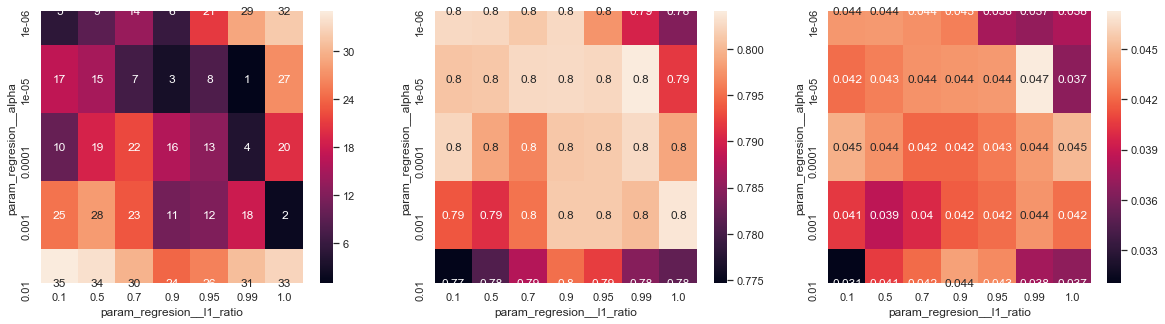

In [24]:
import seaborn as sns 
sns.set()
fig,ax = plt.subplots(1, 3, figsize=(20,5))

ax = plt.subplot(1, 3, 1)
pvt_rank = gridresults.pivot(index ='param_regresion__alpha', columns = 'param_regresion__l1_ratio',
                             values = 'rank_test_score')
sns.heatmap(pvt_rank,annot=True);
ax = plt.subplot(1, 3, 2)
pvt_mean = gridresults.pivot(index ='param_regresion__alpha', columns = 'param_regresion__l1_ratio',
                             values = 'mean_test_score')
sns.heatmap(pvt_mean,annot=True);
ax = plt.subplot(1, 3, 3)
pvt_std = gridresults.pivot(index = 'param_regresion__alpha', columns ='param_regresion__l1_ratio',
                            values = 'std_test_score')
sns.heatmap(pvt_std,annot=True);

In [25]:
import matplotlib
matplotlib.__version__

'3.1.1'